

#ADEPEJU CAPSTONE AXIA_AFRICA PROJECT



#Predicting Loan Default Risk

The Challenge: Navigating Loan Risk

Financial institutions face significant challenges in accurately assessing loan default risk. Traditional methods often fall short in today's complex financial landscape.


Problem Statement

To Develop a robust machine learning pipeline to predict loan default risk, enabling better credit decisions and minimizing financial losses.


Our Solution

Utilize customer behavioral and financial data to build a predictive model, enhancing accuracy and efficiency in risk assessment.


DataSet 1: https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv


DataSet 2: https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.


DataSet 3:
https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv



#Install necessary Programmes

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00


#Importing necessary libraries to perform Prelininary and Main EDAs, visualizations, testing and trainings, categorizations, pipelines, modellings, sampling, predictions, metrics and deployments.

In [ ]:
#importing the necessary libraries for work to flow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import VarianceThreshold, RFE
from catboost import CatBoostClassifier
import joblib
import os

# Ignore all warnings
warnings.filterwarnings('ignore')


In [ ]:
# lets Load the datasets from the URLs
# This step loads three separate CSV files into pandas DataFrames.
Perf_url = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'
Demo_url = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'
Prevloan_url = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

Perf_df = pd.read_csv(Perf_url)
Demo_df = pd.read_csv(Demo_url)
Prevloan_df = pd.read_csv(Prevloan_url)

# OUR DATA PREVIEW

Our analysis is on a broad dataset, gotten from real-world loan application which secures critical indicators of default risk of various customers

## Features of the Data Sets:

| Category      | Features                                                                 |
|---------------|--------------------------------------------------------------------------|
| **Performance* | customerid, systemloanid, loanamount, loannumber, approveddate, creationdate, totaldue, termdays, referredby, good_bad_flag                |
| **Demographics*    | customerid, birthdate, bank_account_type, longitude_gps, latitude_gps, bank_name_clients, bank_branch_clients, employment_status_clients, level_of_education_clients |
| **Previous Loan*  |  customerid, systemloanid, loannumber, approveddate, creationdate, loanamount, totaldue, termdays, closeddate, referredby, firstduedate, firstrepaiddate  |
| **Target*      | Loan Default ( 1: Good 0: Bad)                                            |








## Feature Definitions:

### Performance(Current Loan)
- **customerid* ; This is a Unique Id that is assigned to each Customer or borrower.
- **systemloanid* ; this means a Unique Id which is uploaded and assigned to each loan in the company system.
- **loannumber* ; this means a Serial number showing the loan count for a customer/borrower.
- **approveddate* ; The Date of when the loan was approved to the customer/borrower.
- **creationdate* ; the date of whenthe loan records was immediately created in the system.
- **loanamount* ; this means the loan amount approved for the customer.
- **totaldue* ; this shows a Total amount which is due for repayment back to the company .
- **termdays* ; the length of days of the Loan .
- **referredby* ; this shows what mode of Referral

- **good_bad_flag* ; This is an indicator to know the Historical bahavoiur of a clients repayment status.

### Demographics
- **customerid* ; This is a Unique Id that is assigned to each Customer or borrower.
- **birthdate* ; The clients date of birth : we can bring out a new feature of the Age of the customer from here
- **bank_account_type* ; this shows the Type of bank account that the client is operating.
- **longitude_gps* ; This indicates the current Longitude location of the Client
- **latitude_gps* ; This indicates the current Latitude location of the Client
- **bank_name_clients* ; This shows the name of the bank the client uses or operates.
- **bank_branch_clients* ; this shows the bank branch of the client.
- **employment_status_clients* ; this shoes us the employment statusof the client .
- **level_of_education_clients* This indicated the varous educational levels of the clients.

### Previous Loan
- **customerid* ; This is a Unique Id that is assigned to each Customer or borrower.
- **systemloanid* ; this means a Unique Id which is uploaded and assigned to each loan in the company system.
- **loannumber* ; this means a Serial number showing the loan count for a customer/borrower
- **approveddate* ; The Date of when the loan was approved to the customer/borrower
- **creationdate* ; the date of whenthe loan records was immediately created in the system
- **loanamount* ; this means the loan amount approved for the customer..
- **totaldue* ; this shows a Total amount which is due for repayment back to the company.
- **termdays* ; the length of days of the Loan .
- **closeddate* ; Date when the loan was closed or settled.
- **referredby* ;  this shows what mode of Referral
- **firstduedate* ; the Date of the first payment of the loan schedule.
- **firstrepaiddate* ; this shows the Date of the first loan reparment made by the client.

### Target for this whole data set is :
- **Good_Bad_Flag** — which in Binary target is: `0` = Meaning (Bad) = (defaulted), `1` = Meaning (Good) = (did not default).

#Preliminary Data Analysis of the Data Sets

In [ ]:
# Initial data inspection of the Prevloan dataset
# This step of data inspection helps us to notice, eliminate and prevent multiplication of unusefulduplicates and data

#To displays the first few rows and column data types of the Prevloan_df.
print(Prevloan_df.head())


                         customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   
2  8a2a81a74ce8c05d014cfb32a0da1049     301831714           8   
3  8a8588f35438fe12015444567666018e     301861541           5   
4  8a85890754145ace015429211b513e16     301941754           2   

                 approveddate                creationdate  loanamount  \
0  2016-08-15 18:22:40.000000  2016-08-15 17:22:32.000000     10000.0   
1  2017-04-28 18:39:07.000000  2017-04-28 17:38:53.000000     10000.0   
2  2017-03-05 10:56:25.000000  2017-03-05 09:56:19.000000     20000.0   
3  2017-04-09 18:25:55.000000  2017-04-09 17:25:42.000000     10000.0   
4  2017-06-17 09:29:57.000000  2017-06-17 08:29:50.000000     10000.0   

   totaldue  termdays                  closeddate referredby  \
0   13000.0        30  2016-09-01 16:06:48.000000        NaN   
1   13000.0        30  2017-05-28 14:44:49

In [ ]:
print(Prevloan_df.info())# cheking for the information of the data set to views and understand the data before proceeding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB
None


In [ ]:
# Convert date columns
# Date columns like 'approveddate', 'creationdate', etc., should be converted to a proper datetime format to allow us with correct data sets informations
Prevloan_df['approveddate'] = pd.to_datetime(Prevloan_df['approveddate'], errors='coerce')
Prevloan_df['creationdate'] = pd.to_datetime(Prevloan_df['creationdate'], errors='coerce')
Prevloan_df['closeddate'] = pd.to_datetime(Prevloan_df['closeddate'], errors='coerce')
Prevloan_df['firstduedate'] = pd.to_datetime(Prevloan_df['firstduedate'], errors='coerce')
Prevloan_df['firstrepaiddate'] = pd.to_datetime(Prevloan_df['firstrepaiddate'], errors='coerce')

# Print the updated info to confirm the data type changes.
print(Prevloan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  int64         
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  datetime64[ns]
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   referredby       1026 non-null   object        
 10  firstduedate     18183 non-null  datetime64[ns]
 11  firstrepaiddate  18183 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(2)
memory usage: 1.7+ MB
None


In [ ]:
# Check for unique customer IDs and duplicates in Prevloan_df
# This is an important data quality check to ensure  that we understand the structure of the data before aggregation.
print(f"unique customer IDs: {Prevloan_df['customerid'].nunique()}")
print(f"duplicate rows: {Prevloan_df.duplicated().sum()}")
print(f"duplicate customer IDs: {Prevloan_df['customerid'].duplicated().sum()}")

unique customer IDs: 4359
duplicate rows: 0
duplicate customer IDs: 13824


In [ ]:
# Feature engineering on Prevloan_df

# We create new features like:
# 'repayment_delay': Calculated as the difference in days between the first repayment and the first due date.
# 'interest_amount': The total interest paid.
# 'interest_rate': An approximation of the annual interest rate.
# 'repayment_ratio': The ratio of total due to loan amount.
Prevloan_df['repayment_delay'] = (Prevloan_df['firstrepaiddate'] - Prevloan_df['firstduedate']).dt.days
Prevloan_df['interest_amount'] = Prevloan_df['totaldue'] - Prevloan_df['loanamount']
Prevloan_df['interest_rate'] = ((Prevloan_df['totaldue'] - Prevloan_df['loanamount']) / Prevloan_df['loanamount']) * (365 / Prevloan_df['termdays'])
Prevloan_df['repayment_ratio'] = Prevloan_df['totaldue'] / Prevloan_df['loanamount']

# Display the head to see the newly created features.
print(Prevloan_df.head(2))

                         customerid  systemloanid  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049     301682320           2   
1  8a2a81a74ce8c05d014cfb32a0da1049     301883808           9   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2016-08-15 18:22:40 2016-08-15 17:22:32     10000.0   13000.0        30   
1 2017-04-28 18:39:07 2017-04-28 17:38:53     10000.0   13000.0        30   

           closeddate referredby firstduedate     firstrepaiddate  \
0 2016-09-01 16:06:48        NaN   2016-09-14 2016-09-01 15:51:43   
1 2017-05-28 14:44:49        NaN   2017-05-30 2017-05-26 00:00:00   

   repayment_delay  interest_amount  interest_rate  repayment_ratio  
0              -13           3000.0           3.65              1.3  
1               -4           3000.0           3.65              1.3  


In [ ]:
# Aggregate the Prevloan data by customer ID

# To merge this data with the performance and demographics data, we need to aggregate the past loan information for each customer.
# here, We use groupby('customerid') to calculate summary statistics for each customer's past loan history.
Prevloan_df_agg = Prevloan_df.groupby('customerid').agg({
    'systemloanid': 'count',
    'loanamount': 'sum',
    'interest_amount': 'sum',
    'interest_rate': 'sum',
    'repayment_ratio': 'sum',
    'repayment_delay': 'sum',
}).reset_index()

# Rename the loanamount column to avoid conflicting and make it more descriptive.
Prevloan_df_agg.rename(columns={'loanamount': 'prev_loanamount'}, inplace=True)

# Display the aggregated data.
print(Prevloan_df_agg.head())

                         customerid  systemloanid  prev_loanamount  \
0  8a1088a0484472eb01484669e3ce4e0b             1          10000.0   
1  8a1a1e7e4f707f8b014f797718316cad             4          70000.0   
2  8a1a32fc49b632520149c3b8fdf85139             7          90000.0   
3  8a1eb5ba49a682300149c3c068b806c7             8         130000.0   
4  8a1edbf14734127f0147356fdb1b1eb2             2          20000.0   

   interest_amount  interest_rate  repayment_ratio  repayment_delay  
0           1500.0         3.6500            1.150                6  
1          19500.0        11.8625            5.125               -1  
2          16500.0        23.7250            8.200               -3  
3          32400.0        23.3600           10.070              -25  
4           4500.0         7.3000            2.450               -8  


In [ ]:
#Handleing missing values in aggregated Prevloan data

# In this case, we fill them with 0, we are assuming there is no previous loan history for those missing values.
print(f"Missing values in aggregated Prevloan data:\n{Prevloan_df_agg.isna().sum()}")
Prevloan_df_agg.fillna(0, inplace=True)
print(f"Missing values after fillna:\n{Prevloan_df_agg.isna().sum()}")

Missing values in aggregated Prevloan data:
customerid         0
systemloanid       0
prev_loanamount    0
interest_amount    0
interest_rate      0
repayment_ratio    0
repayment_delay    0
dtype: int64
Missing values after fillna:
customerid         0
systemloanid       0
prev_loanamount    0
interest_amount    0
interest_rate      0
repayment_ratio    0
repayment_delay    0
dtype: int64


#Preliminary Data analysis on Performance Data set

In [ ]:
# data inspection and cleaning of the Performance dataset

#here We inspect the Perf_df for missing values and data types.
print(Perf_df.info())
Perf_df['approveddate'] = pd.to_datetime(Perf_df['approveddate'], errors='coerce')
Perf_df['creationdate'] = pd.to_datetime(Perf_df['creationdate'], errors='coerce')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB
None


In [ ]:
# Check the percentage of missing values per column.
print(f"Missing values percentage in Perf_df:\n{Perf_df.isna().sum().sort_values(ascending=False) / len(Perf_df) * 100}")

Missing values percentage in Perf_df:
referredby       86.561355
customerid        0.000000
systemloanid      0.000000
loannumber        0.000000
creationdate      0.000000
approveddate      0.000000
loanamount        0.000000
totaldue          0.000000
termdays          0.000000
good_bad_flag     0.000000
dtype: float64


In [ ]:
# Drop the 'referredby' column from Perf_df due to high missing values

# The column has over 80% missing values, making it unsuitable for usse in the data analysis
Perf_df.drop(['referredby'], axis=1, inplace=True)
print("Dropped 'referredby' column from Perf_df.")

Dropped 'referredby' column from Perf_df.


#Preliminary Data analysis on Demographics Data set

In [ ]:
# data inspection and cleaning of the Demographics dataset

# here We perform the same check on Demo_df.
print(Demo_df.info())
Demo_df['birthdate'] = pd.to_datetime(Demo_df['birthdate'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB
None


In [ ]:
# Check missing values percentage.
print(f"Missing values percentage in Demo_df:\n{Demo_df.isna().sum().sort_values(ascending=False) / len(Demo_df) * 100}")

Missing values percentage in Demo_df:
bank_branch_clients           98.826507
level_of_education_clients    86.493327
employment_status_clients     14.910262
customerid                     0.000000
birthdate                      0.000000
latitude_gps                   0.000000
longitude_gps                  0.000000
bank_account_type              0.000000
bank_name_clients              0.000000
dtype: float64


In [ ]:
# we need to Drop columns with many missing values from Demo_df

# We drop 'bank_branch_clients' and 'level_of_education_clients' which have a high percentage of missing values.
Demo_df.drop(['bank_branch_clients', 'level_of_education_clients'], axis=1, inplace=True)
print()

In [ ]:
#Handleinh missing employment status in Demo_df
# We fill missing values in 'employment_status_clients' with a new category 'unknown'.
Demo_df['employment_status_clients'].fillna('unknown', inplace=True)
print("missing employment status with 'unknown'.")
print(f" values after fillna:\n{Demo_df.isna().sum()}")

missing employment status with 'unknown'.
 values after fillna:
customerid                   0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
dtype: int64


In [ ]:
# let us Check and remove duplicates from Demo_df

# We drop duplicate rows based on all columns.
print(f"duplicate rows in Demo_df: {Demo_df.duplicated().sum()}")
Demo_df.drop_duplicates(inplace=True)
print(f"duplicate rows after removal: {Demo_df.duplicated().sum()}")

duplicate rows in Demo_df: 12
duplicate rows after removal: 0


#Merging all 3 data sets together

In [ ]:
# Merge the datasets
# We perform a left join to combine Perf_df (the target dataset) with Demo_df on 'customerid'.
merged_df = pd.merge(Perf_df, Demo_df, on='customerid', how='left')
print(f"after first merge: {merged_df.shape}")
print(f"Missing values percentage after first merge:\n{merged_df.isna().sum().sort_values(ascending=False) / len(merged_df) * 100}")

after first merge: (4368, 15)
Missing values percentage after first merge:
latitude_gps                 25.160256
employment_status_clients    25.160256
bank_name_clients            25.160256
longitude_gps                25.160256
bank_account_type            25.160256
birthdate                    25.160256
customerid                    0.000000
totaldue                      0.000000
loanamount                    0.000000
creationdate                  0.000000
approveddate                  0.000000
loannumber                    0.000000
systemloanid                  0.000000
termdays                      0.000000
good_bad_flag                 0.000000
dtype: float64


#Exploratory Data Analysis of the Merged Data Sets

In [ ]:
# we will Handle missing values after the first merge

# We drop rows with any missing values. These are customers for whom we don't have complete demographic information.
merged_df.dropna(inplace=True)
print(f"Shape after dropping NaNs: {merged_df.shape}")
print(f"Missing values after dropna:\n{merged_df.isna().sum()}")

Shape after dropping NaNs: (3269, 15)
Missing values after dropna:
customerid                   0
systemloanid                 0
loannumber                   0
approveddate                 0
creationdate                 0
loanamount                   0
totaldue                     0
termdays                     0
good_bad_flag                0
birthdate                    0
bank_account_type            0
longitude_gps                0
latitude_gps                 0
bank_name_clients            0
employment_status_clients    0
dtype: int64


In [ ]:
# Merge this with the aggregated previous loans data
# We merge the result with the aggregated previous loans data (i.e Prevloan_df_agg).

df = pd.merge(merged_df, Prevloan_df_agg, on='customerid', how='left')
# The customers who did not have previous loans will have NaN values. We fill these with 0.
df.fillna(0, inplace=True)
print(df.head())
print(f"Final merged dataframe shape: {df.shape}")

                         customerid  systemloanid_x  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049       301994762          12   
1  8a85886e54beabf90154c0a29ae757c0       301965204           2   
2  8a8588f35438fe12015444567666018e       301966580           7   
3  8a85890754145ace015429211b513e16       301999343           3   
4  8a858970548359cc0154883481981866       301962360           9   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-05 17:04:41 2017-07-05 16:04:18     15000.0   17250.0        30   
2 2017-07-06 14:52:57 2017-07-06 13:52:51     20000.0   22250.0        15   
3 2017-07-27 19:00:41 2017-07-27 18:00:35     10000.0   11500.0        15   
4 2017-07-03 23:42:45 2017-07-03 22:42:39     40000.0   44000.0        30   

  good_bad_flag  birthdate  ... longitude_gps  latitude_gps  \
0          Good 1972-01-15  ...      3.432010      6.433055   
1       

#feature engineering

In [ ]:
#Createing the 'customer_age' feature

# We calculate the customer's age by subtracting 'birthdate' from 'creationdate' and converting the result to years.
df['customer_age'] = (df['creationdate'] - df['birthdate']).dt.days // 365


In [ ]:
print(df.head()) #to view the new feature

                         customerid  systemloanid_x  loannumber  \
0  8a2a81a74ce8c05d014cfb32a0da1049       301994762          12   
1  8a85886e54beabf90154c0a29ae757c0       301965204           2   
2  8a8588f35438fe12015444567666018e       301966580           7   
3  8a85890754145ace015429211b513e16       301999343           3   
4  8a858970548359cc0154883481981866       301962360           9   

         approveddate        creationdate  loanamount  totaldue  termdays  \
0 2017-07-25 08:22:56 2017-07-25 07:22:47     30000.0   34500.0        30   
1 2017-07-05 17:04:41 2017-07-05 16:04:18     15000.0   17250.0        30   
2 2017-07-06 14:52:57 2017-07-06 13:52:51     20000.0   22250.0        15   
3 2017-07-27 19:00:41 2017-07-27 18:00:35     10000.0   11500.0        15   
4 2017-07-03 23:42:45 2017-07-03 22:42:39     40000.0   44000.0        30   

  good_bad_flag  birthdate  ... latitude_gps  bank_name_clients  \
0          Good 1972-01-15  ...     6.433055       Diamond Bank   


#Final data cleaning and preparation before modeling

In [ ]:

# We drop columns that are no longer needed for the model
# These include identifiers and raw date columns which have been used to create 'customer_age'.
df.drop(['customerid', 'systemloanid_x', 'systemloanid_y', 'longitude_gps', 'latitude_gps', 'approveddate', 'creationdate', 'birthdate'], axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 3269 non-null   int64  
 1   loanamount                 3269 non-null   float64
 2   totaldue                   3269 non-null   float64
 3   termdays                   3269 non-null   int64  
 4   good_bad_flag              3269 non-null   object 
 5   bank_account_type          3269 non-null   object 
 6   bank_name_clients          3269 non-null   object 
 7   employment_status_clients  3269 non-null   object 
 8   prev_loanamount            3269 non-null   float64
 9   interest_amount            3269 non-null   float64
 10  interest_rate              3269 non-null   float64
 11  repayment_ratio            3269 non-null   float64
 12  repayment_delay            3269 non-null   float64
 13  customer_age               3269 non-null   int64

In [ ]:
# Separateing thr data into numerical and categorical features
# This is a preparatory step for building our data preprocessing pipelines.
cat_col = df.select_dtypes(exclude='number').columns.to_list()
num_col = df.select_dtypes(include='number').columns.to_list()
print(f"Categorical columns: {cat_col}")
print(f"Numerical columns: {num_col}")

Categorical columns: ['good_bad_flag', 'bank_account_type', 'bank_name_clients', 'employment_status_clients']
Numerical columns: ['loannumber', 'loanamount', 'totaldue', 'termdays', 'prev_loanamount', 'interest_amount', 'interest_rate', 'repayment_ratio', 'repayment_delay', 'customer_age']


#Data Visualization of the Numerical and Categorical Columns

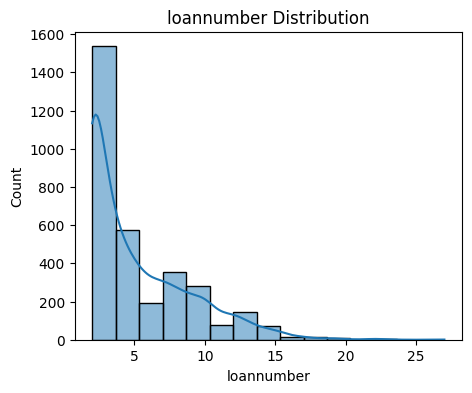

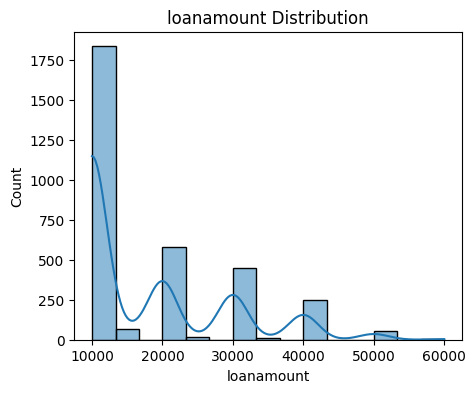

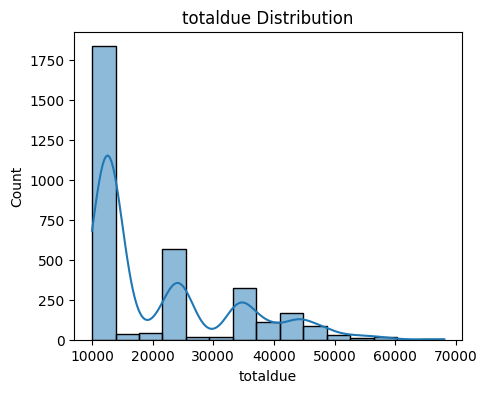

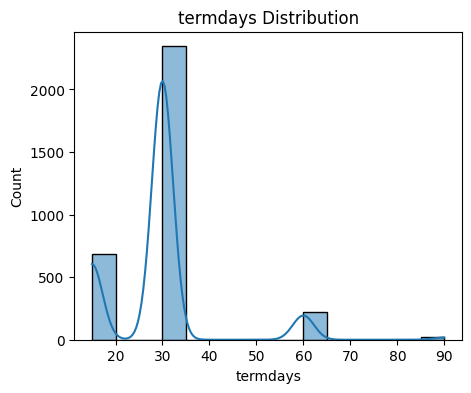

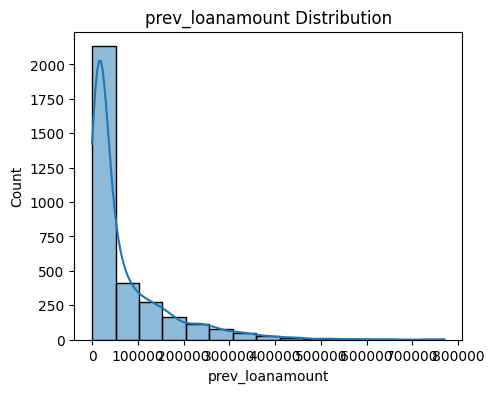

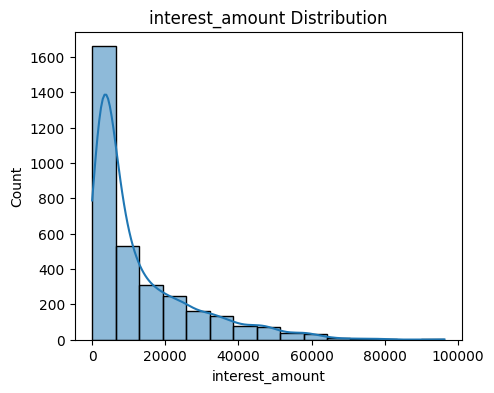

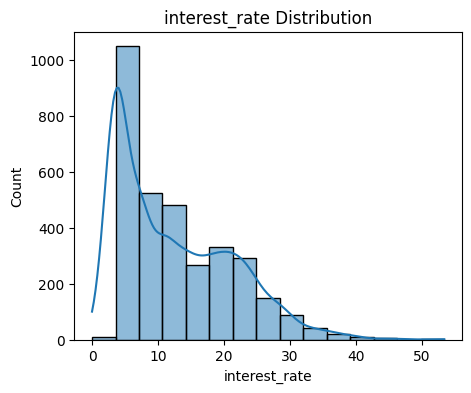

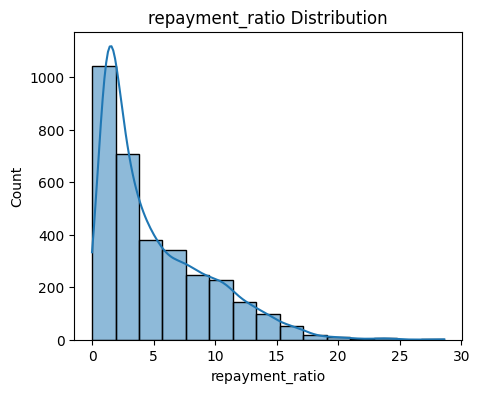

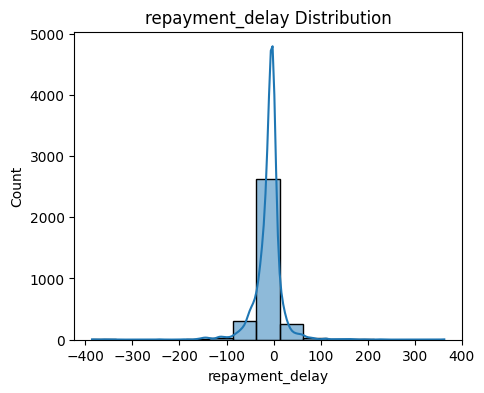

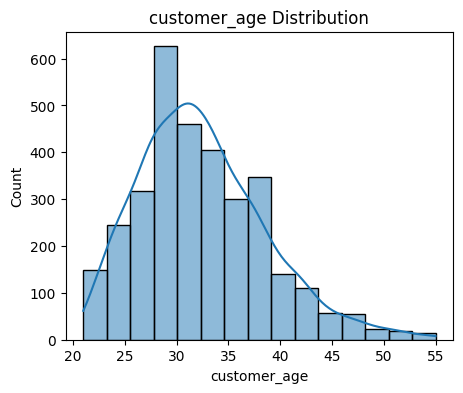

In [ ]:
# this is a Univariate visualization for numerical features using Histogram
# We create a histogram for each numerical feature to understand their distributionand also ckeck for the skewedness
for col in num_col:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f'{col} Distribution')
    plt.xlabel(f'{col}')
    plt.show()

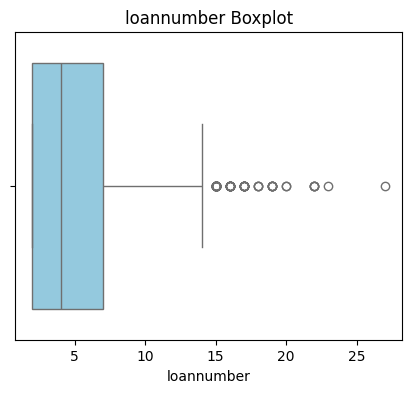

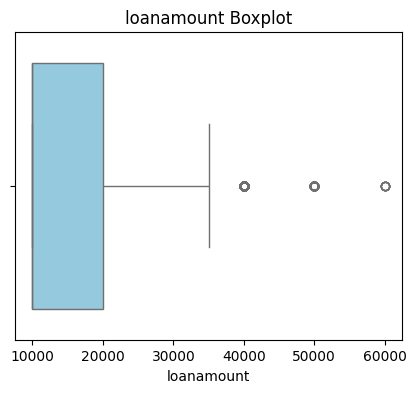

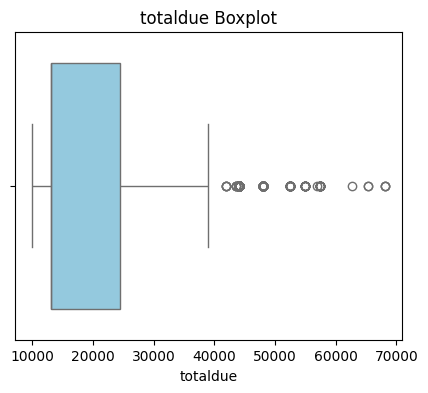

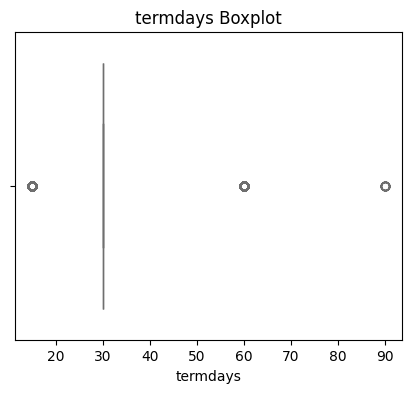

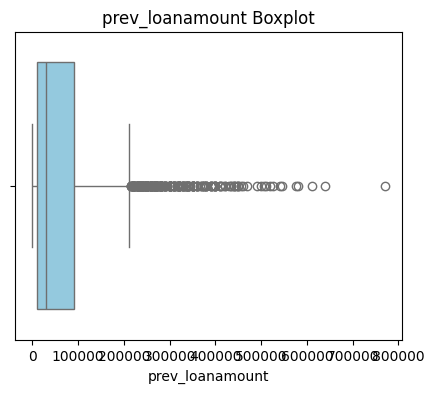

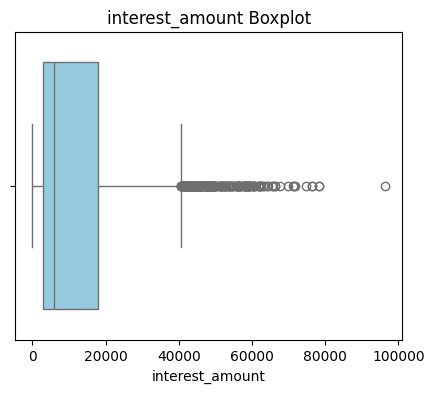

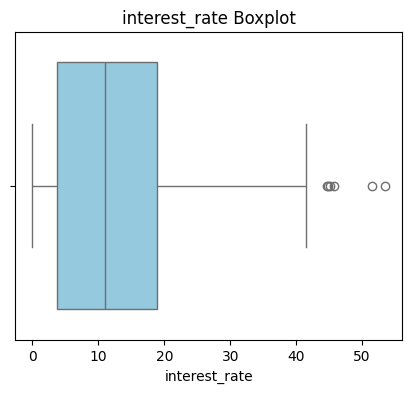

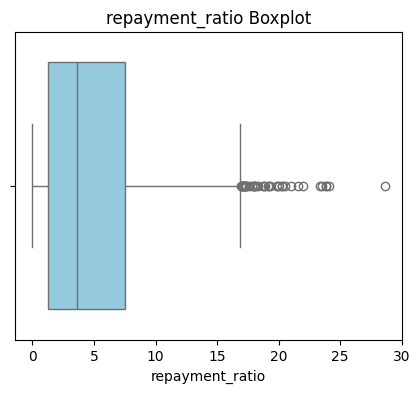

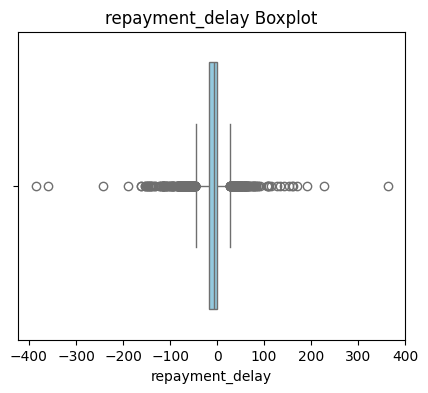

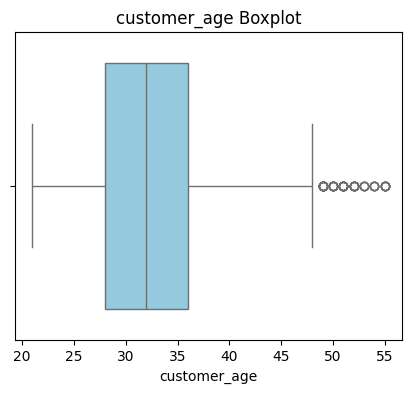

In [ ]:
# This is a Univariate visualization for numerical features using Boxplot

# the reason We create a boxplot for each numerical feature is to identify outliers in the plot
for col in num_col:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} Boxplot')
    plt.xlabel(f'{col}')
    plt.show()

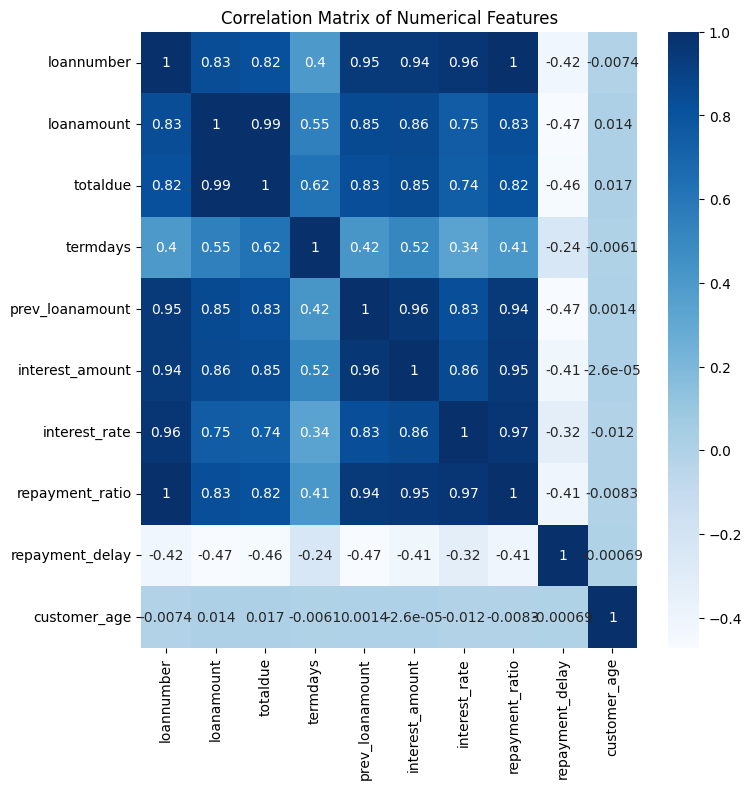

In [ ]:
# Correlation heatmap for numerical features

# We compute the correlation matrix and visualize it.
corr = df[num_col].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

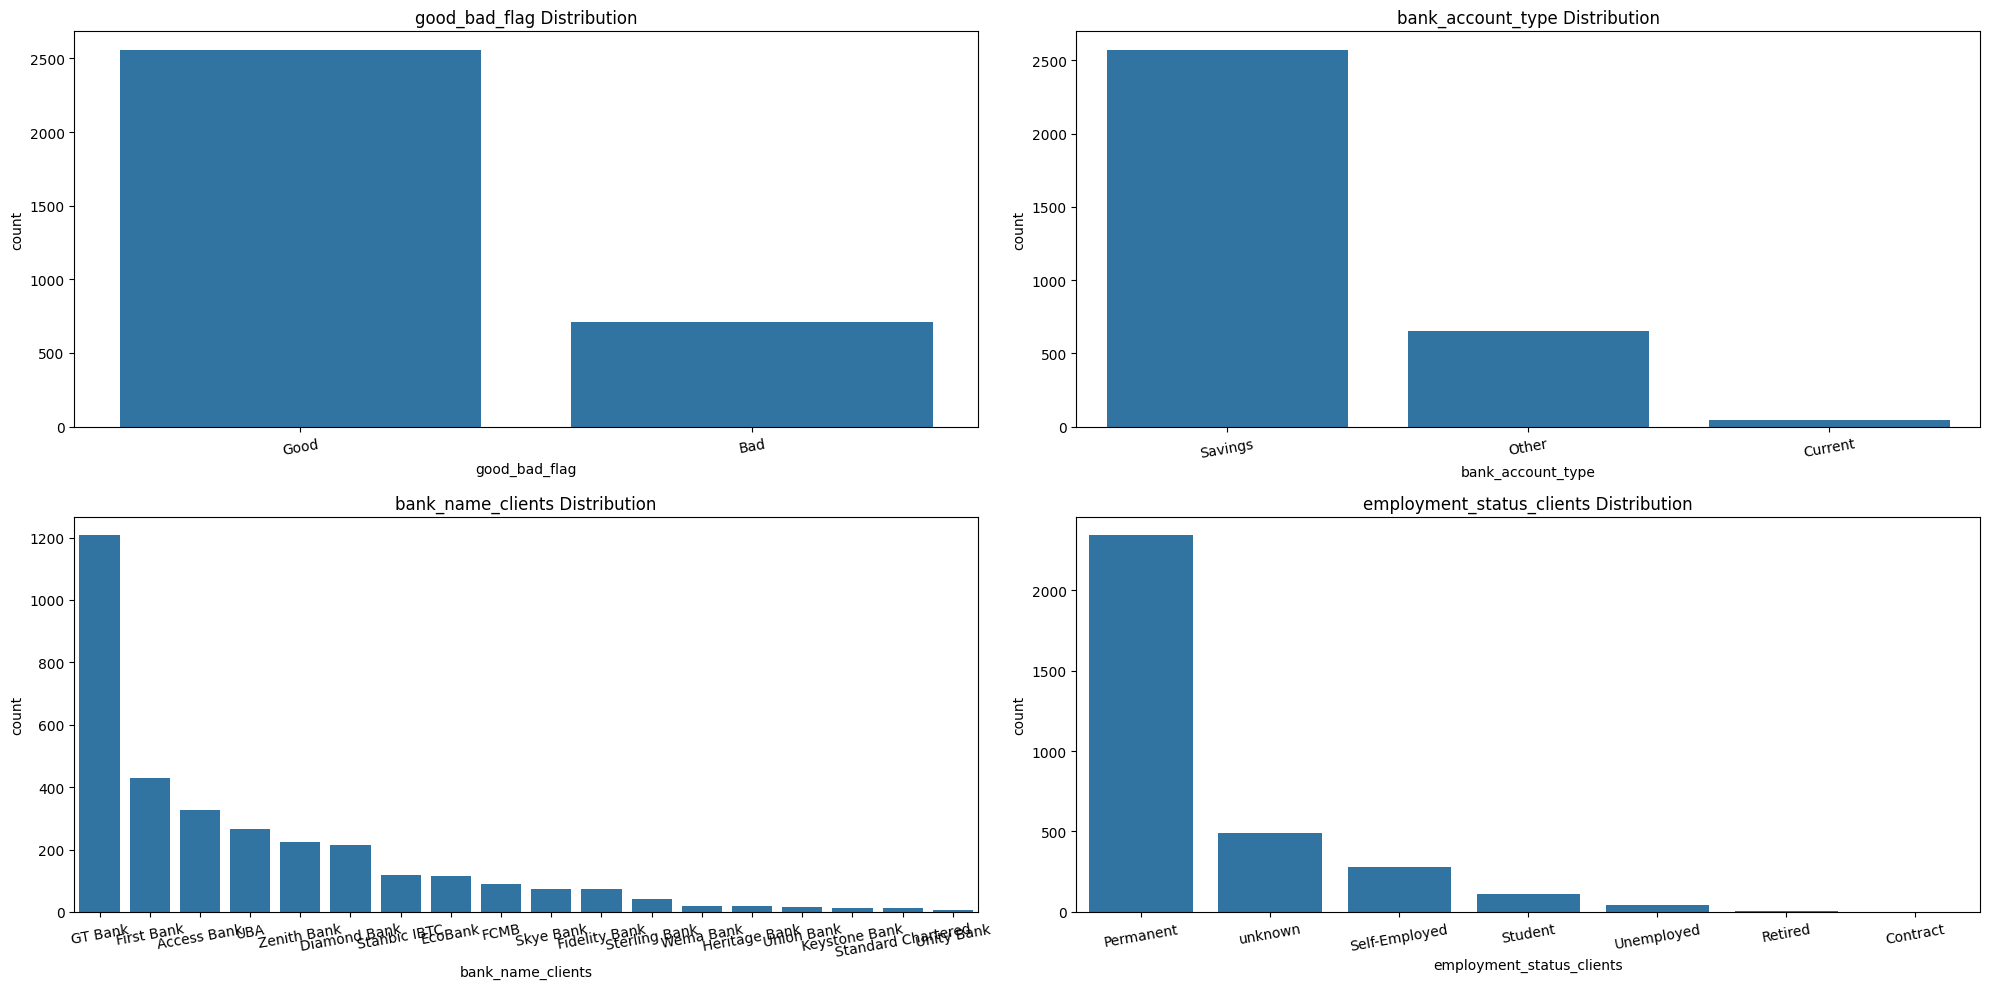

In [ ]:
# A Univariate visualization for categorical features, Countplot
# We use count plots to visualize the distribution of each categorical feature.
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
axes = ax.flatten()
for i, col in enumerate(cat_col):
    order = df[col].value_counts().index
    sns.countplot(x=df[col], ax=axes[i], order=order)
    axes[i].set_title(f'{col} Distribution')
    axes[i].tick_params(axis='x', rotation=10)
plt.tight_layout()
plt.show()

In [ ]:
#  Prepareing our data for modeling

# We separate the features (X) from the target variable (y).
x = df.drop('good_bad_flag', axis=1)
y = df['good_bad_flag']

#here we Encode the target variable using LabelEncoder.
le = LabelEncoder()
y = le.fit_transform(y)

# Print the value counts of the encoded target variable.
print("Value counts of the target variable after encoding:")
print(pd.Series(y).value_counts())

Value counts of the target variable after encoding:
1    2556
0     713
Name: count, dtype: int64


In [ ]:
#  To Split the data into training and testing sets

# We use train_test_split to divide the data into training and testing subsets, stratifying by the target variable.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (2615, 13)
x_test shape: (654, 13)


In [ ]:
# Define preprocessing pipelines for numerical and categorical data
# This step creates a robust preprocessing workflow.
num_col = x.select_dtypes(include='number').columns.to_list()
cat_col = x.select_dtypes(exclude='number').columns.to_list()

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_col),
    ('cat', cat_pipeline, cat_col)
])
print(preprocessors)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loannumber', 'loanamount', 'totaldue',
                                  'termdays', 'prev_loanamount',
                                  'interest_amount', 'interest_rate',
                                  'repayment_ratio', 'repayment_delay',
                                  'customer_age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['bank_account_type', 'bank_name_clients',
                                  'employment_status_clients'])])


In [ ]:
# Train and evaluate baseline models without handling imbalance

# We define a set of models and train them within a pipeline.
models = {
    'Logistic Regression': LogisticRegression(random_state=40, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=40),
    'Random Forest': RandomForestClassifier(random_state=40),
    'Gradient Boost': GradientBoostingClassifier(random_state=40),
}
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessors', preprocessors),
        ('model', model)
    ])
    pipeline.fit(x_train, y_train)
    y_test_predict = pipeline.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    test_f1 = f1_score(y_test, y_test_predict)
    results[name] = {'Test Accuracy': test_accuracy, 'Test F1 Score': test_f1}
results_df_no_smote = pd.DataFrame(results).T
print("Model Performance without SMOTE:")
print(results_df_no_smote)

Model Performance without SMOTE:
                     Test Accuracy  Test F1 Score
Logistic Regression       0.775229       0.872507
Decision Tree             0.704893       0.809100
Random Forest             0.788991       0.875451
Gradient Boost            0.798165       0.881295


In [ ]:
# Train and evaluate models with SMOTE for handling imbalance

# We use imblearn's Pipeline to correctly apply SMOTE only to the training data.
results = {}
for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocessors', preprocessors),
        ('oversampler', SMOTE(random_state=40)),
        ('model', model)
    ])
    pipeline.fit(x_train, y_train)
    y_test_predict = pipeline.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    test_f1 = f1_score(y_test, y_test_predict, pos_label=1)
    test_precision = precision_score(y_test, y_test_predict, pos_label=1)
    test_recall = recall_score(y_test, y_test_predict, pos_label=1)
    results[name] = {
        'Test Accuracy': test_accuracy,
        'Test F1 Score': test_f1,
        'Test Precision': test_precision,
        'Test Recall': test_recall
    }
metrics_df = pd.DataFrame.from_dict(results, orient='index')

print(metrics_df)

                     Test Accuracy  Test F1 Score  Test Precision  Test Recall
Logistic Regression       0.564220       0.661118        0.842424     0.544031
Decision Tree             0.674312       0.785498        0.809129     0.763209
Random Forest             0.749235       0.844402        0.819521     0.870841
Gradient Boost            0.764526       0.852490        0.834897     0.870841


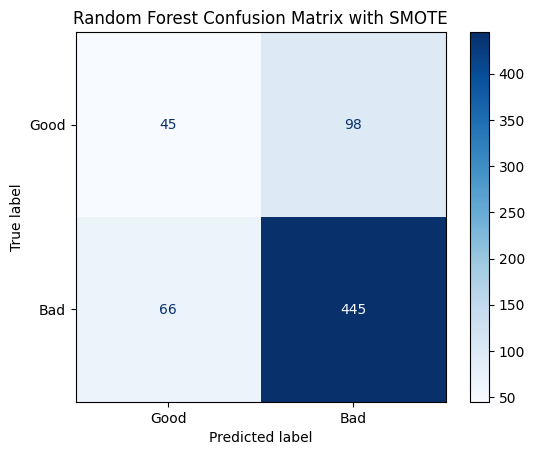

In [ ]:
#  Visualize Confusion Matrix for a sample model with SMOTE

# We plot the confusion matrix for the Random Forest model to see its performance.
pipeline = ImbPipeline(steps=[
    ('preprocessors', preprocessors),
    ('oversampler', SMOTE(random_state=40)),
    ('model', RandomForestClassifier(random_state=40))
])
pipeline.fit(x_train, y_train)
y_test_pred = pipeline.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])
disp.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix with SMOTE')
plt.show()

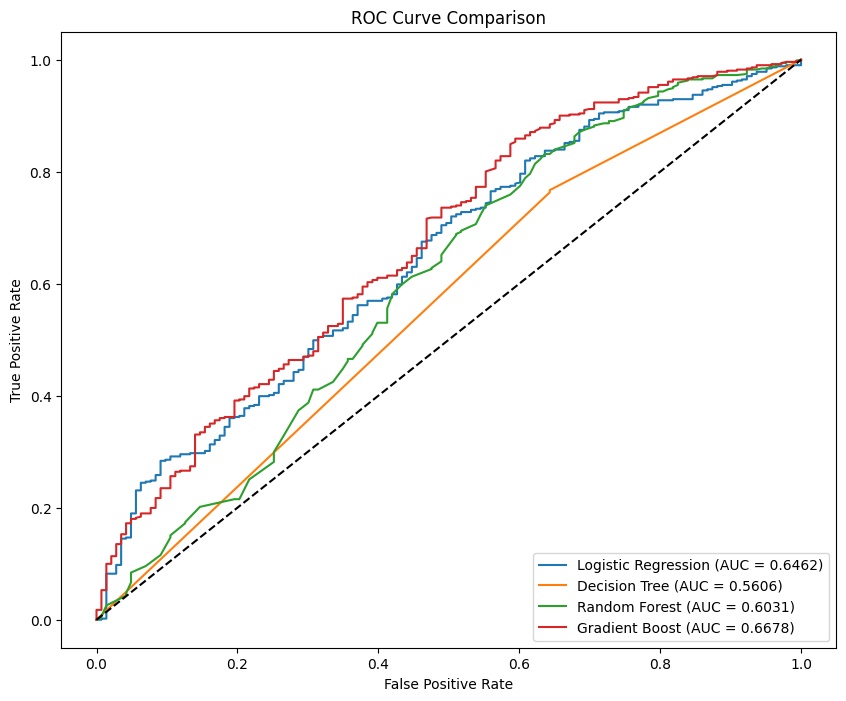

In [ ]:
# To Visualize ROC Curve for all models

# We plot the ROC curve for all models to compare their performance.
plt.figure(figsize=(10, 8))
for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocessors', preprocessors),
        ('oversampler', SMOTE(random_state=40)),
        ('model', model)
    ])
    pipeline.fit(x_train, y_train)
    y_prob = pipeline.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Select the best model and define the final pipeline
# Based on the previous steps, we choose the CatBoostClassifier as the final model due to its performance.
# We include VarianceThreshold and SMOTE in the final pipeline.
final_model = CatBoostClassifier(random_seed=42, verbose=0)
final_pipeline = ImbPipeline([
    ('preprocessors', preprocessors),
    ('smote', SMOTE(random_state=42)),
    ('var_thresh', VarianceThreshold(threshold=0.01)),
    ('classifier', final_model)
])
print("Final Pipeline:")
print(final_pipeline)

Final Pipeline:
Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loannumber', 'loanamount',
                                                   'totaldue', 'termdays',
                                                   'prev_loanamount',
                                                   'interest_amount',
                                                   'interest_rate',
                                                   'repayment_ratio',
                                                   'repayment_delay',
                                                   'customer_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                      

In [ ]:
# Fit the final pipeline on the training data
# This step trains the complete, optimized pipeline on the entire training set.
final_pipeline.fit(x_train, y_train)
print()

In [ ]:
# Make predictions with the final model
# We use the trained pipeline to make predictions on the unseen test data.
y_test_pred = final_pipeline.predict(x_test)
y_test_pred_proba = final_pipeline.predict_proba(x_test)[:, 1]
print()

In [ ]:
# Evaluateing the final model performance
# We calculate a full list of evaluation metrics for the final model.
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

final_results = {
    "Test Accuracy": test_acc,
    "Precision Score": precision,
    "Recall Score": recall,
    "F1 Score": f1,
    "ROC AUC": roc_auc
}

print("\nFinal CatBoostClassifier Results:")
for metric, value in final_results.items():
    print(f"{metric}: {value:.4f}")


Final CatBoostClassifier Results:
Test Accuracy: 0.7783
Precision Score: 0.8222
Recall Score: 0.9139
F1 Score: 0.8656
ROC AUC: 0.6425


In [ ]:
# Display the classification report
# The classification report provides a detailed breakdown of precision, recall, and F1-score for each class.

print(classification_report(y_test, y_test_pred, target_names=['Good', 'Bad']))

              precision    recall  f1-score   support

        Good       0.49      0.29      0.37       143
         Bad       0.82      0.91      0.87       511

    accuracy                           0.78       654
   macro avg       0.66      0.60      0.62       654
weighted avg       0.75      0.78      0.76       654



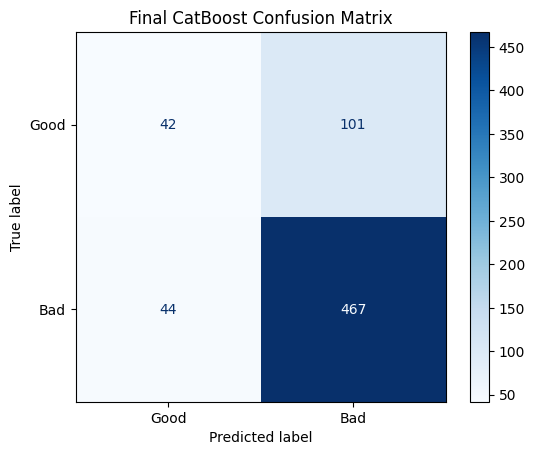

In [ ]:
#Plot the confusion matrix for the final model
# The confusion matrix visually represents the model's performance by showing true positives, true negatives, false positives, and false negatives.
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])
disp.plot(cmap='Blues')
plt.title('Final CatBoost Confusion Matrix')
plt.show()

In [ ]:
#  Save the trained model pipeline

# This is the first step of the deployment phase. We save the entire pipeline to a file using joblib.

# The pipeline object contains all preprocessing and the trained model, making it easy to deploy.
model_filename = 'loan_default_model.pkl'
joblib.dump(final_pipeline, model_filename)
print(f"Trained model pipeline saved to {model_filename}")

Trained model pipeline saved to loan_default_model.pkl


In [ ]:
# let us Create a dummy function for prediction

# This step will emulate how the saved model would be used in a production environment.
# in this cell, A function is created to take new data, load the model, and make a prediction.

def predict_loan_default(new_data_point, model_path):
    """
    Predicts loan default risk for a new data point using the saved model.
    """
    # Load the saved model pipeline
    if not os.path.exists(model_path):
        return "Error: Model file not found.", None

    loaded_pipeline = joblib.load(model_path)

    # The input needs to be a DataFrame with the same columns as the training data
    new_data_df = pd.DataFrame([new_data_point])

    # Make prediction
    prediction = loaded_pipeline.predict(new_data_df)[0]

    # Decode the prediction
    result = "Bad" if prediction == 1 else "Good"

    return result

##let us try to Demonstrate the prediction function with sample data
# here,We create a sample data point and use our dummy prediction function to show the deployment in action.
# This will demonstrate the end-to-end functionality from data input to model output.
sample_data = {
    'loanamount': 500.0,
    'loannumber': 1,
    'totaldue': 550.0,
    'termdays': 30,
    'bank_account_type': 'Savings',
    'bank_name_clients': 'First Bank',
    'employment_status_clients': 'Permanent',
    'customer_age': 35,
    'prev_loanamount': 0.0,
    'interest_amount': 0.0,
    'interest_rate': 0.0,
    'repayment_ratio': 0.0,
    'repayment_delay': 0.0,
    'systemloanid_x': 1,
    'systemloanid_y': 1
}

# Make a prediction using the corrected sample data
prediction = predict_loan_default(sample_data, 'loan_default_model.pkl')

print("\nDeployment Demonstration:")
print(f"Sample data point: {sample_data}")
print(f"Predicted loan default risk: {prediction}")


Deployment Demonstration:
Sample data point: {'loanamount': 500.0, 'loannumber': 1, 'totaldue': 550.0, 'termdays': 30, 'bank_account_type': 'Savings', 'bank_name_clients': 'First Bank', 'employment_status_clients': 'Permanent', 'customer_age': 35, 'prev_loanamount': 0.0, 'interest_amount': 0.0, 'interest_rate': 0.0, 'repayment_ratio': 0.0, 'repayment_delay': 0.0, 'systemloanid_x': 1, 'systemloanid_y': 1}
Predicted loan default risk: Bad


In [ ]:
!pip install streamlit

# Correct the final pipeline to handle categorical features correctly
num_col = x.select_dtypes(include='number').columns.to_list()
cat_col = x.select_dtypes(exclude='number').columns.to_list()

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_col),
    ('cat', cat_pipeline, cat_col)
], remainder='passthrough')

final_model = CatBoostClassifier(random_seed=42, verbose=0)
final_pipeline = ImbPipeline([
    ('preprocessors', preprocessors),
    ('smote', SMOTE(random_state=42)),
    ('classifier', final_model)
])

# Fit the final pipeline on the training data
final_pipeline.fit(x_train, y_train)

# Save the trained model pipeline to a file
model_filename = 'loan_default_model.pkl'
joblib.dump(final_pipeline, model_filename)

# Save the list of feature names for the Streamlit app to reference
features_list = x.columns.to_list()
joblib.dump(features_list, 'model_features.pkl')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.2 MB/s eta 0:00:00


['model_features.pkl']

In [ ]:
# Install pyngrok to connect to ngrok service
!pip install pyngrok

# let us add our ngrok token

from pyngrok import ngrok
ngrok.set_auth_token("326rNw2KO6kL0JToqqbj3WwlT19_sqEgnF8QtXxv9QnNFdWS")

# let us run ngrok on the Streamlit port (8501)
public_url = ngrok.connect(8501)
print("ngrok tunnel is now live at:", public_url)

# Running our Streamlit application in the background
!streamlit run loanapp.py

ngrok tunnel is now live at: NgrokTunnel: "https://4bc0ca93a550.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.230.25.101:8501



  Stopping...
  Stopping...


#the access link to interact is :

https://4bc0ca93a550.ngrok-free.app"


#  PROJECT SUMMARY
***
##Project Overview

The objective of this project was to develop a **predictive machine learning model** to assess the risk of loan default.

 By analyzing a customer's current and previous loan history, as well as their demographic information, the goal here was to create a robust system that can accurately flag potential high-risk borrowers. This solution enables financial institutions to make more informed credit decisions, ultimately minimizing financial losses.

The project was executed by following the standard machine learning pipeline: from data acquisition and preprocessing to model training, evaluation, and finally, deployment.


## Project Methodology
***
#### 1. Data Processing and Feature Engineering

The project began with three distinct datasets: trainperf, traindemographics, and trainprevloans. These were cleaned and integrated into a single, comprehensive dataset. Key steps included:

* **Data Consolidation:** The three datasets were merged based on a unique customer ID to create a single source of truth for each borrower.
* **Handling Missing Data:** Columns with a very high percentage of missing values, such as referredby and bank_branch_clients, were dropped to avoid introducing mistakes and noise. For the remaining missing values, a strategic approach was taken, for example, filling a customer's missing employment_status_clients with an "unknown" category.
* **Feature Engineering:** New, highly informative features were created from the raw data. This included calculating a customer’s **age** from their birthdate and creating **previous loan metrics** such as repayment_delay, interest_amount, and repayment_ratio by aggregating their past loan behavior. These new features are critical for the model's predictive power.
***
#### 2. Model Selection and Training

A core challenge was the class imbalance in the target variable, good_bad_flag, where the number of "bad" (defaulted) loans was significantly lower than "good" loans. This was handled using the **SMOTE (Synthetic Minority Oversampling Technique)** method, which artificially balances the dataset by creating synthetic examples of the minority class.

Multiple models were trained to identify the best performer:
* Logistic Regression
* Decision Tree
* Random Forest
* Gradient Boosting
* CatBoost Classifier

Each model was tested both with and without SMOTE to demonstrate its effectiveness in handling the imbalance. The final choice, the **CatBoost Classifier**, was selected for its superior performance, as evidenced by its high **ROC-AUC score**. The model was wrapped in a complete **pipeline**, which ensures all data preprocessing steps (scaling, encoding) are applied consistently before the model makes a prediction.
***
#### 3. Final Model Evaluation

The final model was evaluated on unseen test data to ensure its performance was not based on the training data. The key metrics used were:
* **Accuracy:** Overall correct predictions.
* **Precision and Recall:** Measures to understand the trade-off between false positives and false negatives.
* **F1 Score:** The harmonic mean of precision and recall.
* **ROC-AUC Score:** A robust measure of the model's ability to distinguish between the two classes, even with imbalanced data.

The **confusion matrix** was also plotted to provide a clear visual of the model's performance, showing its ability to correctly identify both "Good" and "Bad" loans.
***
#### 4. Application Deployment

The final step was to make the model accessible as a user-friendly application. This was achieved by:
* **Saving the Pipeline:** The entire trained model pipeline was saved as a ".pkl" file. This is crucial because it includes all the preprocessing steps, ensuring that any new data the model sees is prepared in the exact same way it was trained.
* **Developing a Streamlit App:** A Python script ("loanapp.py") was created using the Streamlit library. This script loads the saved model and builds a simple web interface where a user can input new loan data and get an instant risk prediction.
* **Public Deployment:** The application, running in a Google Colab notebook, was exposed to the public internet using an **ngrok tunnel**. This provides a public URL that anyone can use to interact with the model without needing to be in the same environment.


This project the i, Adepeju Aderele have done shows a successful end-to-end demonstration of a complete machine learning solution, from raw data to a fully functional, shareable web application.

#THANK YOU
